In [ ]:
from scipy.optimize import minimize_scalar

# Define the quadratic function to be maximized (e.g., -j^2 to maximize j)
def quadratic_function(j):
    return -j**2

# Use scipy's minimize_scalar function to find the maximum of the quadratic function
result = minimize_scalar(quadratic_function, method='bounded', bounds=(0, 10))

max_j = result.x
max_value = -result.fun  # Since we were maximizing -j^2, we need to negate the result

print(f"Maximum j: {max_j}")
print(f"Maximum value: {max_value}")


Maximum j: 9.9999947848782
Maximum value: 99.99989569759121


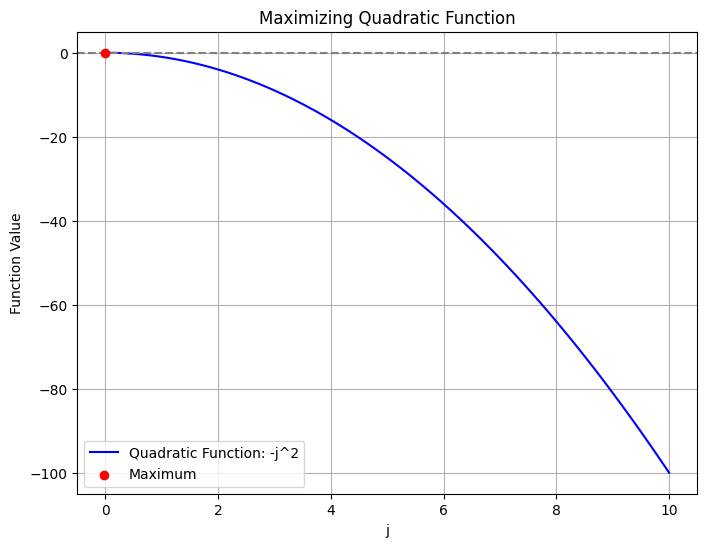

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define the quadratic function
def quadratic_function(j):
    return -j**2

# Generate values of j
j_values = np.linspace(0, 10, 100)

# Calculate corresponding function values
function_values = quadratic_function(j_values)

# Create the plot
plt.figure(figsize=(8, 6))
plt.plot(j_values, function_values, label='Quadratic Function: -j^2', color='blue')
plt.scatter([j_values[np.argmax(function_values)]], [max(function_values)], color='red', label='Maximum', zorder=5)
plt.axhline(y=max(function_values), color='gray', linestyle='--')
plt.xlabel('j')
plt.ylabel('Function Value')
plt.title('Maximizing Quadratic Function')
plt.legend()
plt.grid(True)
plt.show()


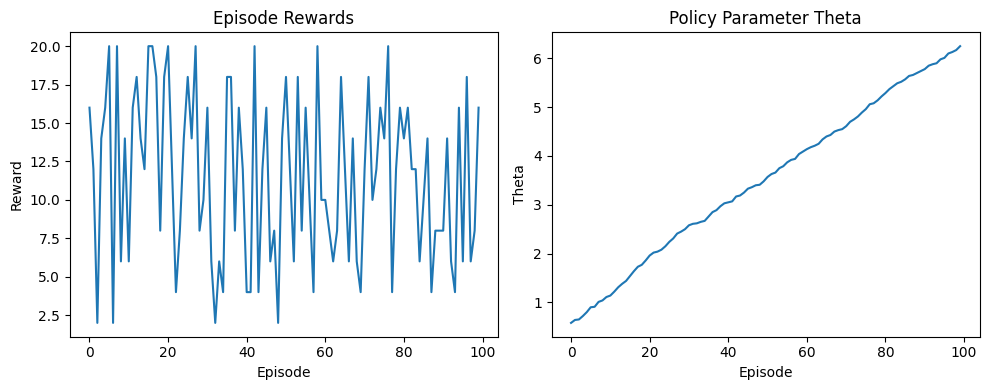

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Simulated environment (reward function)
def get_reward(state):
    return state * 2  # A simple linear relationship for illustration

# Policy function
def policy(state, theta):
    return state * theta

# Gradient ascent update
def update_theta(theta, gradient, learning_rate):
    return theta + learning_rate * gradient

# Parameters
initial_theta = 0.5
learning_rate = 0.01
num_episodes = 100

# Lists to store data for visualization
episode_rewards = []
theta_values = []

# Training loop
theta = initial_theta
for episode in range(num_episodes):
    state = np.random.randint(1, 11)  # Simulated state

    # Compute policy gradient (simplified version)
    gradient = state

    # Update policy parameters using gradient ascent
    theta = update_theta(theta, gradient, learning_rate)

    # Calculate reward and store data
    reward = get_reward(state)
    episode_rewards.append(reward)
    theta_values.append(theta)

# Plot rewards and parameter values
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.plot(episode_rewards)
plt.xlabel('Episode')
plt.ylabel('Reward')
plt.title('Episode Rewards')

plt.subplot(1, 2, 2)
plt.plot(theta_values)
plt.xlabel('Episode')
plt.ylabel('Theta')
plt.title('Policy Parameter Theta')

plt.tight_layout()
plt.show()


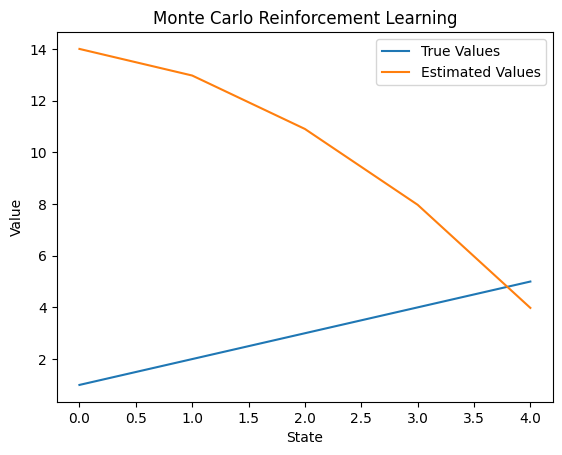

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Simulated environment
num_states = 5
true_state_values = np.array([1, 2, 3, 4, 5])

# Policy (always take action 1)
def policy(state):
    return 1

# Monte Carlo algorithm
def monte_carlo(num_episodes):
    estimated_state_values = np.zeros(num_states)
    returns_count = np.zeros(num_states)

    for episode in range(num_episodes):
        state = np.random.randint(0, num_states)
        episode_states = [state]
        episode_rewards = [0]

        while state != num_states - 1:
            action = policy(state)
            next_state = state + action
            reward = true_state_values[next_state]

            episode_states.append(next_state)
            episode_rewards.append(reward)

            state = next_state

        # Calculate returns and update value estimates
        G = 0
        for t in range(len(episode_states) - 1, -1, -1):
            G = episode_rewards[t] + G
            state = episode_states[t]
            returns_count[state] += 1
            estimated_state_values[state] += (G - estimated_state_values[state]) / returns_count[state]

    return estimated_state_values

# Number of episodes
num_episodes = 1000

# Run Monte Carlo algorithm
estimated_values = monte_carlo(num_episodes)

# Plot true values and estimated values
plt.plot(true_state_values, label='True Values')
plt.plot(estimated_values, label='Estimated Values')
plt.xlabel('State')
plt.ylabel('Value')
plt.title('Monte Carlo Reinforcement Learning')
plt.legend()
plt.show()


State with maximum estimated value: 0
Maximum estimated value: 14.0


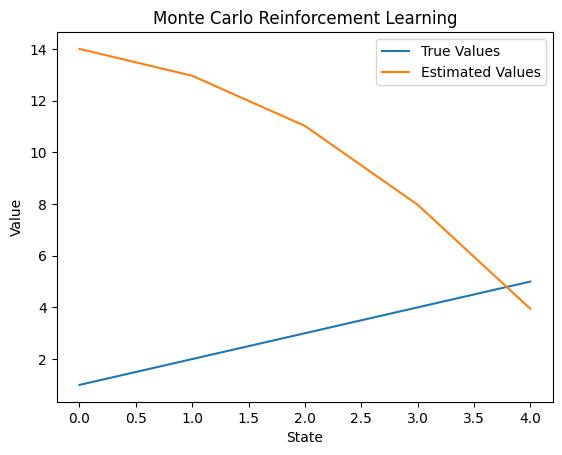

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Simulated environment
num_states = 5
true_state_values = np.array([1, 2, 3, 4, 5])

# Policy (always take action 1)
def policy(state):
    return 1

# Monte Carlo algorithm
def monte_carlo(num_episodes):
    estimated_state_values = np.zeros(num_states)
    returns_count = np.zeros(num_states)

    for episode in range(num_episodes):
        state = np.random.randint(0, num_states)
        episode_states = [state]
        episode_rewards = [0]

        while state != num_states - 1:
            action = policy(state)
            next_state = state + action
            reward = true_state_values[next_state]

            episode_states.append(next_state)
            episode_rewards.append(reward)

            state = next_state

        # Calculate returns and update value estimates
        G = 0
        for t in range(len(episode_states) - 1, -1, -1):
            G = episode_rewards[t] + G
            state = episode_states[t]
            returns_count[state] += 1
            estimated_state_values[state] += (G - estimated_state_values[state]) / returns_count[state]

    return estimated_state_values

# Number of episodes
num_episodes = 1000

# Run Monte Carlo algorithm
estimated_values = monte_carlo(num_episodes)

# Find state with maximum estimated value
max_value_state = np.argmax(estimated_values)
max_value = estimated_values[max_value_state]

# Print maximum value and corresponding state
print(f"State with maximum estimated value: {max_value_state}")
print(f"Maximum estimated value: {max_value}")

# Plot true values and estimated values
plt.plot(true_state_values, label='True Values')
plt.plot(estimated_values, label='Estimated Values')
plt.xlabel('State')
plt.ylabel('Value')
plt.title('Monte Carlo Reinforcement Learning')
plt.legend()
plt.show()


Maximum Value: 18
Selected Items: [4, 3, 2]


<function matplotlib.pyplot.legend(*args, **kwargs)>

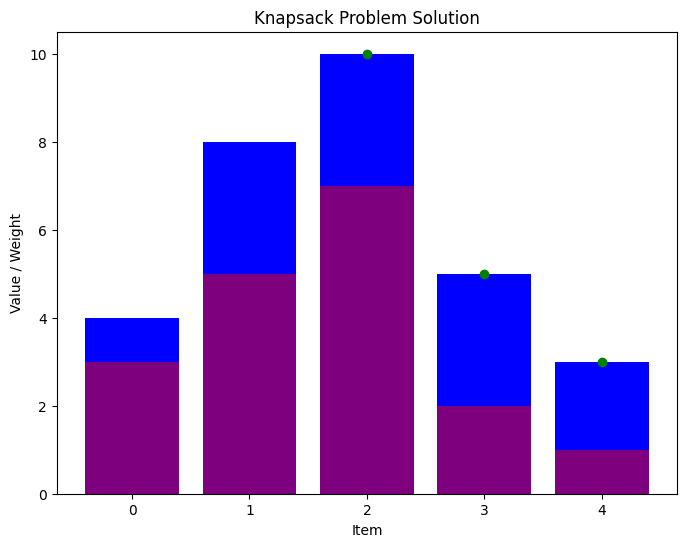

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Knapsack Problem Solver
def knapsack(values, weights, capacity):
    n = len(values)
    dp = np.zeros((n + 1, capacity + 1), dtype=int)

    for i in range(1, n + 1):
        for w in range(1, capacity + 1):
            if weights[i - 1] <= w:
                dp[i][w] = max(dp[i - 1][w], values[i - 1] + dp[i - 1][w - weights[i - 1]])
            else:
                dp[i][w] = dp[i - 1][w]

    selected_items = []
    w = capacity
    for i in range(n, 0, -1):
        if dp[i][w] != dp[i - 1][w]:
            selected_items.append(i - 1)
            w -= weights[i - 1]

    return dp[n][capacity], selected_items

# Knapsack Problem Data
values = [4, 8, 10, 5, 3]
weights = [3, 5, 7, 2, 1]
capacity = 10

# Solve the Knapsack Problem
max_value, selected_items = knapsack(values, weights, capacity)

# Print Results
print("Maximum Value:", max_value)
print("Selected Items:", selected_items)

# Visualize Results
plt.figure(figsize=(8, 6))
plt.bar(range(len(values)), values, label='Values', color='b')
plt.bar(range(len(weights)), weights, label='Weights', color='r', alpha=0.5)
plt.scatter(selected_items, [values[i] for i in selected_items], color='g', label='Selected Items')
plt.xlabel('Item')
plt.ylabel('Value / Weight')
plt.title('Knapsack Problem Solution')
plt.legend
